## Importation des données

In [1]:
# import libraries
import warnings
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


pd.set_option('display.max_rows', 200)


In [2]:
# import datas
PATH_FILE = 'input'
application_train = pd.read_csv(f'{PATH_FILE}/application_train.csv')
bureau = pd.read_csv(f'{PATH_FILE}/bureau.csv')
bureau_balance = pd.read_csv(f'{PATH_FILE}/bureau_balance.csv')
pos_cash = pd.read_csv(f'{PATH_FILE}/POS_CASH_balance.csv')
credit_card_balance = pd.read_csv(f'{PATH_FILE}/credit_card_balance.csv')
previous_application = pd.read_csv(f'{PATH_FILE}/previous_application.csv')
installments_payments = pd.read_csv(f'{PATH_FILE}/installments_payments.csv')
columns_description = pd.read_csv(f'{PATH_FILE}/HomeCredit_columns_description.csv', sep=';', encoding='latin1')


### Description des données

In [3]:
datasets = [application_train, bureau, bureau_balance, pos_cash, credit_card_balance, 
            previous_application, installments_payments, columns_description]

df_names = ["application_train", "bureau", "bureau_balance", "pos_cash", "credit_card_balance", 
          "previous_application", "installments_payments", "columns_description"]

info_df = pd.DataFrame({},)
info_df['dataset'] = df_names
info_df['nb_columns'] = [len(df.columns) for df in datasets]
info_df['columns_name'] = [', '.join(list(df.columns)) for df in datasets]
info_df['nb_rows'] = [len(df) for df in datasets]
info_df
info_df.style.background_gradient(cmap='PuBu')

,dataset,nb_columns,columns_name,nb_rows
0,application_train,122,"SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR",307511
1,bureau,17,"SK_ID_CURR, SK_ID_BUREAU, CREDIT_ACTIVE, CREDIT_CURRENCY, DAYS_CREDIT, CREDIT_DAY_OVERDUE, DAYS_CREDIT_ENDDATE, DAYS_ENDDATE_FACT, AMT_CREDIT_MAX_OVERDUE, CNT_CREDIT_PROLONG, AMT_CREDIT_SUM, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_LIMIT, AMT_CREDIT_SUM_OVERDUE, CREDIT_TYPE, DAYS_CREDIT_UPDATE, AMT_ANNUITY",1716428
2,bureau_balance,3,"SK_ID_BUREAU, MONTHS_BALANCE, STATUS",27299925
3,pos_cash,8,"SK_ID_PREV, SK_ID_CURR, MONTHS_BALANCE, CNT_INSTALMENT, CNT_INSTALMENT_FUTURE, NAME_CONTRACT_STATUS, SK_DPD, SK_DPD_DEF",10001358
4,credit_card_balance,23,"SK_ID_PREV, SK_ID_CURR, MONTHS_BALANCE, AMT_BALANCE, AMT_CREDIT_LIMIT_ACTUAL, AMT_DRAWINGS_ATM_CURRENT, AMT_DRAWINGS_CURRENT, AMT_DRAWINGS_OTHER_CURRENT, AMT_DRAWINGS_POS_CURRENT, AMT_INST_MIN_REGULARITY, AMT_PAYMENT_CURRENT, AMT_PAYMENT_TOTAL_CURRENT, AMT_RECEIVABLE_PRINCIPAL, AMT_RECIVABLE, AMT_TOTAL_RECEIVABLE, CNT_DRAWINGS_ATM_CURRENT, CNT_DRAWINGS_CURRENT, CNT_DRAWINGS_OTHER_CURRENT, CNT_DRAWINGS_POS_CURRENT, CNT_INSTALMENT_MATURE_CUM, NAME_CONTRACT_STATUS, SK_DPD, SK_DPD_DEF",3840312
5,previous_application,37,"SK_ID_PREV, SK_ID_CURR, NAME_CONTRACT_TYPE, AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_DOWN_PAYMENT, AMT_GOODS_PRICE, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, FLAG_LAST_APPL_PER_CONTRACT, NFLAG_LAST_APPL_IN_DAY, RATE_DOWN_PAYMENT, RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED, NAME_CASH_LOAN_PURPOSE, NAME_CONTRACT_STATUS, DAYS_DECISION, NAME_PAYMENT_TYPE, CODE_REJECT_REASON, NAME_TYPE_SUITE, NAME_CLIENT_TYPE, NAME_GOODS_CATEGORY, NAME_PORTFOLIO, NAME_PRODUCT_TYPE, CHANNEL_TYPE, SELLERPLACE_AREA, NA

### Répartition variables numériques et qualitatives

In [4]:
df_columns_type = pd.DataFrame({},)
df_columns_type['dataset'] = df_names
df_columns_type['numeric_columns'] = [len((df.select_dtypes(include=np.number)).columns) for df in datasets]
df_columns_type['numeric_columns_name'] = [', '.join(list((df.select_dtypes(include=np.number)).columns)) for df in datasets]
df_columns_type['object_columns'] = [len((df.select_dtypes(include='object')).columns) for df in datasets]
df_columns_type['object_columns_name'] = [', '.join(list((df.select_dtypes(include='object')).columns)) for df in datasets]
df_columns_type.style.background_gradient(cmap='PuBu')

,dataset,numeric_columns,numeric_columns_name,object_columns,object_columns_name
0,application_train,106,"SK_ID_CURR, TARGET, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, TOTALAREA_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR",16,"NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE, WEEKDAY_APPR_PROCESS_START, ORGANIZATION_TYPE, FONDKAPREMONT_MODE, HOUSETYPE_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE"
1,bureau,14,"SK_ID_CURR, SK_ID_BUREAU, DAYS_CREDIT, CREDIT_DAY_OVERDUE, DAYS_CREDIT_ENDDATE, DAYS_ENDDATE_FACT, AMT_CREDIT_MAX_OVERDUE, CNT_CREDIT_PROLONG, AMT_CREDIT_SUM, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_LIMIT, AMT_CREDIT_SUM_OVERDUE, DAYS_CREDIT_UPDATE, AMT_ANNUITY",3,"CREDIT_ACTIVE, CREDIT_CURRENCY, CREDIT_TYPE"
2,bureau_balance,2,"SK_ID_BUREAU, MONTHS_BALANCE",1,STATUS
3,pos_cash,7,"SK_ID_PREV, SK_ID_CURR, MONTHS_BALANCE, CNT_INSTALMENT, CNT_INSTALMENT_FUTURE, SK_DPD, SK_DPD_DEF",1,NAME_CONTRACT_STATUS
4,credit_card_balance,22,"SK_ID_PREV, SK_ID_CURR, MONTHS_BALANCE, AMT_BALANCE, AMT_CREDIT_LIMIT_ACTUAL, AMT_DRAWINGS_ATM_CURRENT, AMT_DRAWINGS_CURRENT, AMT_DRAWINGS_OTHER_CURRENT, AMT_DRAWINGS_POS_CURRENT, AMT_INST_MIN_REGULARITY, AMT_PAYMENT_CURRENT, AMT_PAYMENT_TOTAL_CURRENT, AMT_RECEIVABLE_PRINCIPAL, AMT_RECIVABLE, AMT_TOTAL_RECEIVABLE, CNT_DRAWINGS_ATM_CURRENT, CNT_DRAWINGS_CURRENT, CNT_DRAWINGS_OTHER_CURRENT, CNT_DRAWINGS_POS_CURRENT, CNT_INSTALMENT_MATURE_CUM, SK_DPD, SK_DPD_DEF",1,NAME_CONTRACT_STATUS
5,previous_application,21,"SK_ID_PREV, SK_ID_CURR, AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_DOWN_PAYMENT, AMT_GOODS_PRICE, HOUR_APPR_PROCESS_START, NFLAG_LAST_APPL_IN_DAY, RATE_DOWN_PAYMENT, RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED, DAYS_DECISION, SELLERPLACE_AREA, CNT_PAYMENT, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION, NFLAG_INSURED_ON_APPROVAL",16,"NAME_CONTRACT_TYPE, WEEKDAY_APPR_PROCESS_START, FLAG_LAST_APPL_PER_CONTRACT, NAME_CASH_LOAN_PURPOSE, NAME_CONTRACT_STATU

### Variable Cible : Distribution
Déséquilibre de la répartition des valeurs, les clients en défaut de paiement sont **sous-représentés**.

(307511, 122)


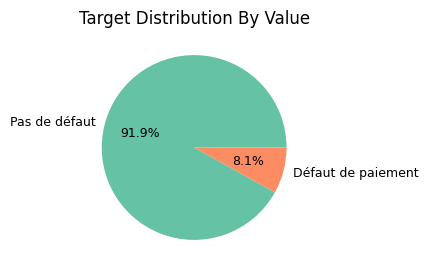

In [5]:

# Répartition de la variable cible
print(application_train.shape)

plt.figure(figsize=(3,3))
labels=["Pas de défaut","Défaut de paiement"]
plt.pie(application_train["TARGET"].value_counts(),
        labels = labels,
        autopct='%.01f%%',
        textprops={'fontsize':9},
        colors=sns.color_palette('Set2')
)
plt.title(label="Target Distribution By Value")
plt.show()

# Processing Application Train

## Valeurs manquantes

In [5]:
 # NaN values for DAYS_EMPLOYED: 365243 -> nan
application_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

C:\Users\fly\AppData\Local\Temp\ipykernel_16848\93370763.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  application_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)


In [6]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df, seuil):
    # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    cols_with_missing_values = [col for col in df.columns if df[col].isnull().mean() > seuil]

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.\n"
        "There are " + str(len(cols_with_missing_values)) + f" columns that have more than {seuil*100}% of missing values.\n")


    # Return the dataframe with missing information
    return mis_val_table_ren_columns, cols_with_missing_values

# Missing values statistics
missing_values, cols_with_50pct_missing_values = missing_values_table(application_train, seuil = 0.5)
missing_values.head(80)



Your selected dataframe has 122 columns.
There are 68 columns that have missing values.
There are 41 columns that have more than 50.0% of missing values.



,Missing Values,% of Total Values
COMMONAREA_MODE,214865,69.9
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4


In [7]:
cols_with_50pct_missing_values
application_train[cols_with_50pct_missing_values].dtypes

OWN_CAR_AGE                 float64
EXT_SOURCE_1                float64
APARTMENTS_AVG              float64
BASEMENTAREA_AVG            float64
YEARS_BUILD_AVG             float64
COMMONAREA_AVG              float64
ELEVATORS_AVG               float64
ENTRANCES_AVG               float64
FLOORSMIN_AVG               float64
LANDAREA_AVG                float64
LIVINGAPARTMENTS_AVG        float64
LIVINGAREA_AVG              float64
NONLIVINGAPARTMENTS_AVG     float64
NONLIVINGAREA_AVG           float64
APARTMENTS_MODE             float64
BASEMENTAREA_MODE           float64
YEARS_BUILD_MODE            float64
COMMONAREA_MODE             float64
ELEVATORS_MODE              float64
ENTRANCES_MODE              float64
FLOORSMIN_MODE              float64
LANDAREA_MODE               float64
LIVINGAPARTMENTS_MODE       float64
LIVINGAREA_MODE             float64
NONLIVINGAPARTMENTS_MODE    float64
NONLIVINGAREA_MODE          float64
APARTMENTS_MEDI             float64
BASEMENTAREA_MEDI           

In [8]:
application_train[cols_with_50pct_missing_values].describe(include=[np.number]).T


,count,mean,std,min,25%,50%,75%,max
OWN_CAR_AGE,104582.0,12.061091,11.944812,0.000000,5.000000,9.000000,15.000000,91.000000
EXT_SOURCE_1,134133.0,0.502130,0.211062,0.014568,0.334007,0.505998,0.675053,0.962693
APARTMENTS_AVG,151450.0,0.117440,0.108240,0.000000,0.057700,0.087600,0.148500,1.000000
BASEMENTAREA_AVG,127568.0,0.088442,0.082438,0.000000,0.044200,0.076300,0.112200,1.000000
YEARS_BUILD_AVG,103023.0,0.752471,0.113280,0.000000,0.687200,0.755200,0.823200,1.000000
COMMONAREA_AVG,92646.0,0.044621,0.076036,0.000000,0.007800,0.021100,0.051500,1.000000
ELEVATORS_AVG,143620.0,0.078942,0.134576,0.000000,0.000000,0.000000,0.120000,1.000000
ENTRANCES_AVG,152683.0,0.149725,0.100049,0.000000,0.069000,0.137900,0.206900,1.000000
FLOORSMIN_AVG,98869.0,0.231894,0.161380,0.000000,0.083300,0.208300,0.375000,1.000000
LANDAREA_AVG,124921.0,0.066333,0.081184,0.000000,0.018700,0.048100,0.085600,1.000000


In [10]:
# Drop columns with more than 50% missing values
application_train.drop(labels=cols_with_50pct_missing_values, axis=1, inplace=True)
print(application_train.shape)

(307511, 81)


### Imputation des valeurs manquantes

In [11]:
# Suppression de la variable cible dans le X-train
y_train = application_train['TARGET']
X_train = application_train.drop(labels='TARGET', axis=1, inplace=False)
X_train.shape, y_train.shape

# Split numerical and categorical columns
numeric_columns = X_train.select_dtypes(include='number').columns
categorical_columns = X_train.select_dtypes(include='object').columns

#create two DataFrames, one for each data type
data_numeric = X_train[numeric_columns]
data_categorical = X_train[categorical_columns]

# Impute missing values for numerical columns with median values
si = SimpleImputer(missing_values=np.nan, strategy='median')
data_numeric = pd.DataFrame(si.fit_transform(data_numeric), columns = si.get_feature_names_out())

# Impute missing values for categorical columns with most frequent values
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_categorical = pd.DataFrame(si.fit_transform(data_categorical), columns = si.get_feature_names_out())

In [12]:
# Check null values for data_numeric
data_numeric[numeric_columns].isnull().mean()

SK_ID_CURR                      0.0
CNT_CHILDREN                    0.0
AMT_INCOME_TOTAL                0.0
AMT_CREDIT                      0.0
AMT_ANNUITY                     0.0
AMT_GOODS_PRICE                 0.0
REGION_POPULATION_RELATIVE      0.0
DAYS_BIRTH                      0.0
DAYS_EMPLOYED                   0.0
DAYS_REGISTRATION               0.0
DAYS_ID_PUBLISH                 0.0
FLAG_MOBIL                      0.0
FLAG_EMP_PHONE                  0.0
FLAG_WORK_PHONE                 0.0
FLAG_CONT_MOBILE                0.0
FLAG_PHONE                      0.0
FLAG_EMAIL                      0.0
CNT_FAM_MEMBERS                 0.0
REGION_RATING_CLIENT            0.0
REGION_RATING_CLIENT_W_CITY     0.0
HOUR_APPR_PROCESS_START         0.0
REG_REGION_NOT_LIVE_REGION      0.0
REG_REGION_NOT_WORK_REGION      0.0
LIVE_REGION_NOT_WORK_REGION     0.0
REG_CITY_NOT_LIVE_CITY          0.0
REG_CITY_NOT_WORK_CITY          0.0
LIVE_CITY_NOT_WORK_CITY         0.0
EXT_SOURCE_2                

In [13]:
# Check null values for data_categorical
data_categorical[categorical_columns].isnull().mean()

NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
FLAG_OWN_REALTY               0.0
NAME_TYPE_SUITE               0.0
NAME_INCOME_TYPE              0.0
NAME_EDUCATION_TYPE           0.0
NAME_FAMILY_STATUS            0.0
NAME_HOUSING_TYPE             0.0
OCCUPATION_TYPE               0.0
WEEKDAY_APPR_PROCESS_START    0.0
ORGANIZATION_TYPE             0.0
EMERGENCYSTATE_MODE           0.0
dtype: float64

In [128]:
#join the two masked dataframes back together
X_train_joined = pd.concat([data_numeric, data_categorical], axis = 1)

In [207]:
X_train_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 80 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  float64
 1   CNT_CHILDREN                  307511 non-null  float64
 2   AMT_INCOME_TOTAL              307511 non-null  float64
 3   AMT_CREDIT                    307511 non-null  float64
 4   AMT_ANNUITY                   307511 non-null  float64
 5   AMT_GOODS_PRICE               307511 non-null  float64
 6   REGION_POPULATION_RELATIVE    307511 non-null  float64
 7   DAYS_BIRTH                    307511 non-null  float64
 8   DAYS_EMPLOYED                 307511 non-null  float64
 9   DAYS_REGISTRATION             307511 non-null  float64
 10  DAYS_ID_PUBLISH               307511 non-null  float64
 11  FLAG_MOBIL                    307511 non-null  float64
 12  FLAG_EMP_PHONE                307511 non-nul

### Traitement variables catégorielles

In [35]:
print(X_train_joined.select_dtypes(exclude=[np.number]).columns.to_list())


['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE']


In [36]:
# Liste des valeurs uniques dans les colonnes catégorielles restantes
df_distinct_values_cat_columns = pd.DataFrame({},)
df_distinct_values_cat_columns['categorical_columns'] = categorical_columns
df_distinct_values_cat_columns['nb_distinct_values'] = [X_train_joined[col].nunique() for col in X_train_joined[categorical_columns]]
df_distinct_values_cat_columns['list_of_values'] = [', '.join(np.unique(X_train_joined[col].values)) for col in categorical_columns]
df_distinct_values_cat_columns.style.background_gradient(cmap='PuBu')


,categorical_columns,nb_distinct_values,list_of_values
0,NAME_CONTRACT_TYPE,2,"Cash loans, Revolving loans"
1,CODE_GENDER,3,"F, M, XNA"
2,FLAG_OWN_CAR,2,"N, Y"
3,FLAG_OWN_REALTY,2,"N, Y"
4,NAME_TYPE_SUITE,7,"Children, Family, Group of people, Other_A, Other_B, Spouse, partner, Unaccompanied"
5,NAME_INCOME_TYPE,8,"Businessman, Commercial associate, Maternity leave, Pensioner, State servant, Student, Unemployed, Working"
6,NAME_EDUCATION_TYPE,5,"Academic degree, Higher education, Incomplete higher, Lower secondary, Secondary / secondary special"
7,NAME_FAMILY_STATUS,6,"Civil marriage, Married, Separated, Single / not married, Unknown, Widow"
8,NAME_HOUSING_TYPE,6,"Co-op apartment, House / apartment, Municipal apartment, Office apartment, Rented apartment, With parents"
9,OCCUPATION_TYPE,18,"Accountants, Cleaning staff, Cooking staff, Core staff, Drivers, HR staff, High skill tech staff, IT staff, Laborers, Low-skill Laborers, Managers, Medicine staff, Private service staff, Realty agents, Sales staff, Secretaries, Security staff, Waiters/barmen staff"


#### Variables binaires

In [129]:
# CODE_GENDER : 4 valeurs manquantes pour le genre, on remplace la valeur XNA par F car c'est la valeur la plus fréquente
X_train_joined['CODE_GENDER'].value_counts()
X_train_joined['CODE_GENDER'] = X_train_joined['CODE_GENDER'].replace(['XNA'],'F')

# Categorical features with Binary encode (0 or 1; two categories)
X_train_joined['CODE_GENDER'], uniques = pd.factorize(X_train_joined['CODE_GENDER'])
X_train_joined['CODE_GENDER'].value_counts()



CODE_GENDER
1    202452
0    105059
Name: count, dtype: int64

In [130]:
for col_binaire in ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    X_train_joined[col_binaire] = X_train_joined[col_binaire].map({'Y': 1, 'N': 0})


#### Variables Multimodale
Regroupement des catégories

In [131]:
# NAME_TYPE_SUITE : Client accompagné de qui ?
X_train_joined['NAME_TYPE_SUITE'].value_counts(normalize=True)
mapping_name_type_suite = {
    'Unaccompanied' : 'Unaccompanied',
    'Family' : 'Family',
    'Spouse, partner' : 'Family',
    'Children' : 'Family',
    'Other_A' : 'Other',
    'Other_B' : 'Other',
    'Group of people' : 'Other'
}
X_train_joined['NAME_TYPE_SUITE'] = X_train_joined['NAME_TYPE_SUITE'].map(mapping_name_type_suite)

In [132]:
X_train_joined['NAME_TYPE_SUITE'].value_counts()


NAME_TYPE_SUITE
Unaccompanied    249818
Family            54786
Other              2907
Name: count, dtype: int64

In [133]:
# NAME_INCOME_TYPE : Type de revenu du client
X_train_joined['NAME_INCOME_TYPE'].value_counts(normalize=True)
mapping_name_income_type = {
    'Working' : 'Working',
    'Commercial associate' : 'Commercial associate',
    'Pensioner' : 'Pensioner or Unemployed',
    'State servant' : 'State servant',
    'Unemployed' : 'Pensioner or Unemployed',
    'Student' : 'Pensioner or Unemployed',
    'Businessman' : 'Other',
    'Maternity leave' : 'Other'
}
X_train_joined['NAME_INCOME_TYPE'] = X_train_joined['NAME_INCOME_TYPE'].map(mapping_name_income_type)

In [112]:
X_train_joined['NAME_INCOME_TYPE'].value_counts(normalize=True)

NAME_INCOME_TYPE
Working                    0.516320
Commercial associate       0.232892
Pensioner or Unemployed    0.180163
State servant              0.070576
Other                      0.000049
Name: proportion, dtype: float64

In [134]:
# NAME_EDUCATION_TYPE : Type d'éducation le plus élevé
X_train_joined['NAME_EDUCATION_TYPE'].value_counts(normalize=True)
mapping_name_education_type = {
    'Lower secondary' : 'Secondary or Lower',
    'Secondary / secondary special' : 'Secondary or Lower',
    'Higher education' : 'Higher education',
    'Academic degree' : 'Higher education',
    'Incomplete higher' : 'Higher education'
}

X_train_joined['NAME_EDUCATION_TYPE'] = X_train_joined['NAME_EDUCATION_TYPE'].map(mapping_name_education_type)

In [114]:
X_train_joined['NAME_EDUCATION_TYPE'].value_counts(normalize=True)

NAME_EDUCATION_TYPE
Secondary or Lower    0.722599
Higher education      0.277401
Name: proportion, dtype: float64

In [135]:
# NAME_HOUSING_TYPE : Type de logement
X_train_joined['NAME_HOUSING_TYPE'].value_counts(normalize=True)
X_train_joined['NAME_HOUSING_TYPE'] = np.where(X_train_joined['NAME_HOUSING_TYPE']!= 'House / apartment', 'Other', 'House / apartment')


In [116]:
X_train_joined['NAME_HOUSING_TYPE'].value_counts(normalize=True)


NAME_HOUSING_TYPE
House / apartment    0.887344
Other                0.112656
Name: proportion, dtype: float64

In [136]:
# Drop de colonnes
X_train_joined['ORGANIZATION_TYPE'].value_counts() # 19% de XNA
X_train_joined.drop(labels='ORGANIZATION_TYPE', axis=1, inplace=True)
X_train_joined.drop(labels='EMERGENCYSTATE_MODE', axis=1, inplace=True)


In [118]:
# Liste des valeurs uniques dans les colonnes catégorielles restantes
categorical_columns = X_train_joined.select_dtypes(include='object').columns

df_distinct_values_cat_columns = pd.DataFrame({},)
df_distinct_values_cat_columns['categorical_columns'] = categorical_columns
df_distinct_values_cat_columns['nb_distinct_values'] = [X_train_joined[col].nunique() for col in X_train_joined[categorical_columns]]
df_distinct_values_cat_columns['list_of_values'] = [', '.join(np.unique(X_train_joined[col].values)) for col in categorical_columns]
df_distinct_values_cat_columns.style.background_gradient(cmap='PuBu')

,categorical_columns,nb_distinct_values,list_of_values
0,NAME_CONTRACT_TYPE,2,"Cash loans, Revolving loans"
1,NAME_TYPE_SUITE,3,"Family, Other, Unaccompanied"
2,NAME_INCOME_TYPE,5,"Commercial associate, Other, Pensioner or Unemployed, State servant, Working"
3,NAME_EDUCATION_TYPE,2,"Higher education, Secondary or Lower"
4,NAME_FAMILY_STATUS,6,"Civil marriage, Married, Separated, Single / not married, Unknown, Widow"
5,NAME_HOUSING_TYPE,2,"House / apartment, Other"
6,OCCUPATION_TYPE,18,"Accountants, Cleaning staff, Cooking staff, Core staff, Drivers, HR staff, High skill tech staff, IT staff, Laborers, Low-skill Laborers, Managers, Medicine staff, Private service staff, Realty agents, Sales staff, Secretaries, Security staff, Waiters/barmen staff"
7,WEEKDAY_APPR_PROCESS_START,7,"FRIDAY, MONDAY, SATURDAY, SUNDAY, THURSDAY, TUESDAY, WEDNESDAY"


### Traitement variables numériques

In [71]:
X_train_joined.describe().T


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307511.0,27108.487841,14493.461065,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307511.0,538316.294367,369288.982246,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,-2251.606131,2136.193492,-1.791200e+04,-2760.000000,-1648.000000,-933.000000,0.000000e+00
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00


In [137]:
# Suppression des variables 'FLAG_MOBIL' et 'FLAG_CONT_MOBILE'
X_train_joined.drop(labels=['FLAG_MOBIL', 'FLAG_CONT_MOBILE'], axis=1, inplace=True) # Très peu de lignes à 0


#### Discrétisation de certaines variables numériques

In [138]:
# CNT CHILDREN
X_train_joined['CNT_CHILDREN'].value_counts(normalize=True)
X_train_joined['CNT_CHILDREN'] = np.where(
    X_train_joined['CNT_CHILDREN'] == 0, '0',
    np.where(X_train_joined['CNT_CHILDREN'] == 1, '1',
        np.where(X_train_joined['CNT_CHILDREN'] >= 2, '2 or more', X_train_joined['CNT_CHILDREN'])
    )
)

In [121]:
X_train_joined['CNT_CHILDREN'].value_counts(normalize=True)


CNT_CHILDREN
0            0.700368
1            0.198754
2 or more    0.100878
Name: proportion, dtype: float64

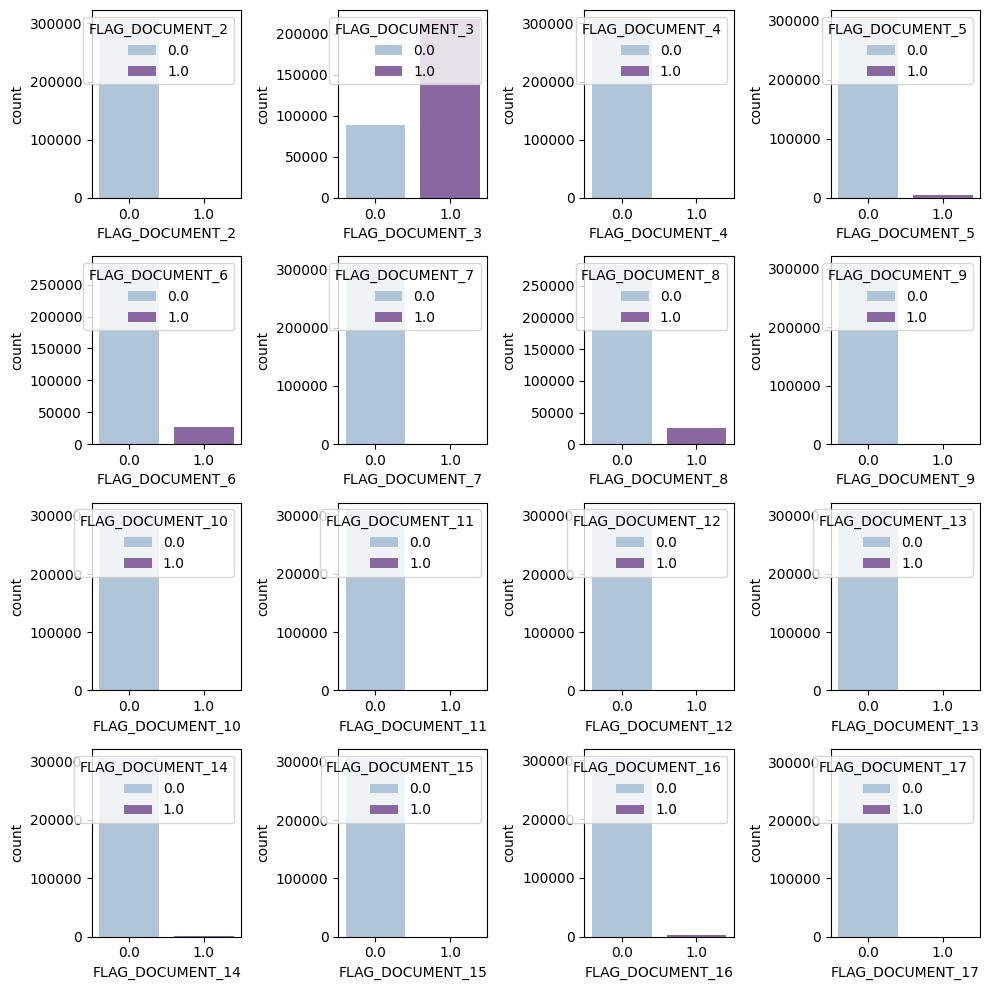

In [97]:
# Les variables flag_document : documents fournis par les clients
cols_flag_document = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 
          'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 
          'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 
          'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

# f, axes = plt.subplots(1, 4)
fig , ax = plt.subplots(4,4, figsize = (10,10))     # set up 2 x 2 frame count plot with figsize 10 x 10


for i , subplots in zip (cols_flag_document, ax.flatten()):
    sns.countplot(
        x = i,
        data = X_train_joined,
        hue = X_train_joined[i],
        ax = subplots,
        palette = 'BuPu'
    )
plt.tight_layout()
plt.show()


In [139]:
# On garde uniquement les variables FLAG_DOCUMENT_3, FLAG_DOCUMENT_6 et FLAG_DOCUMENT_8
# Suppression des autres variables
cols_flag_to_drop = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',  
          'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 
          'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 
          'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

X_train_joined.drop(labels=cols_flag_to_drop, axis=1, inplace=True)

In [124]:
print(X_train_joined.shape)
X_train_joined.info()

(307511, 59)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 59 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  float64
 1   CNT_CHILDREN                  307511 non-null  object 
 2   AMT_INCOME_TOTAL              307511 non-null  float64
 3   AMT_CREDIT                    307511 non-null  float64
 4   AMT_ANNUITY                   307511 non-null  float64
 5   AMT_GOODS_PRICE               307511 non-null  float64
 6   REGION_POPULATION_RELATIVE    307511 non-null  float64
 7   DAYS_BIRTH                    307511 non-null  float64
 8   DAYS_EMPLOYED                 307511 non-null  float64
 9   DAYS_REGISTRATION             307511 non-null  float64
 10  DAYS_ID_PUBLISH               307511 non-null  float64
 11  FLAG_EMP_PHONE                307511 non-null  float64
 12  FLAG_WORK_PHONE               3

In [140]:
list_var = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'] # Variables presques toutes nulles
X_train_joined.drop(labels=list_var, axis=1, inplace=True)

In [141]:
# Ajout de nouvelles features (percentages)
X_train_joined['DAYS_EMPLOYED_PERC'] = X_train_joined['DAYS_EMPLOYED'] / X_train_joined['DAYS_BIRTH'] # taux de jours employés par rapport à l'âge
X_train_joined['INCOME_CREDIT_PERC'] = X_train_joined['AMT_INCOME_TOTAL'] / X_train_joined['AMT_CREDIT'] # 
X_train_joined['INCOME_PER_PERSON'] = X_train_joined['AMT_INCOME_TOTAL'] / X_train_joined['CNT_FAM_MEMBERS'] # revenu par membre du foyer
X_train_joined['ANNUITY_INCOME_PERC'] = X_train_joined['AMT_ANNUITY'] / X_train_joined['AMT_INCOME_TOTAL'] # part de l'annuité par rapport au salaire total du client
X_train_joined['PAYMENT_RATE'] = X_train_joined['AMT_ANNUITY'] / X_train_joined['AMT_CREDIT'] # taux de paiement(somme remboursée) par rapport à la somme finale du crédit par année (previous application)

# Corrélation Spearman

In [ ]:
# - Traitement des missing values Imputation : Médiane/Min/Max pour valerus numériques + Valeurs catégorielles
# - Ajout de colonnes ou discretisation des valeurs continues (bins)
# - Check corrélation par paire et suppression si très corrélés
# Khi2
# RFE
# Passer sur tous les fichiers et en faire des fonctions par fichier

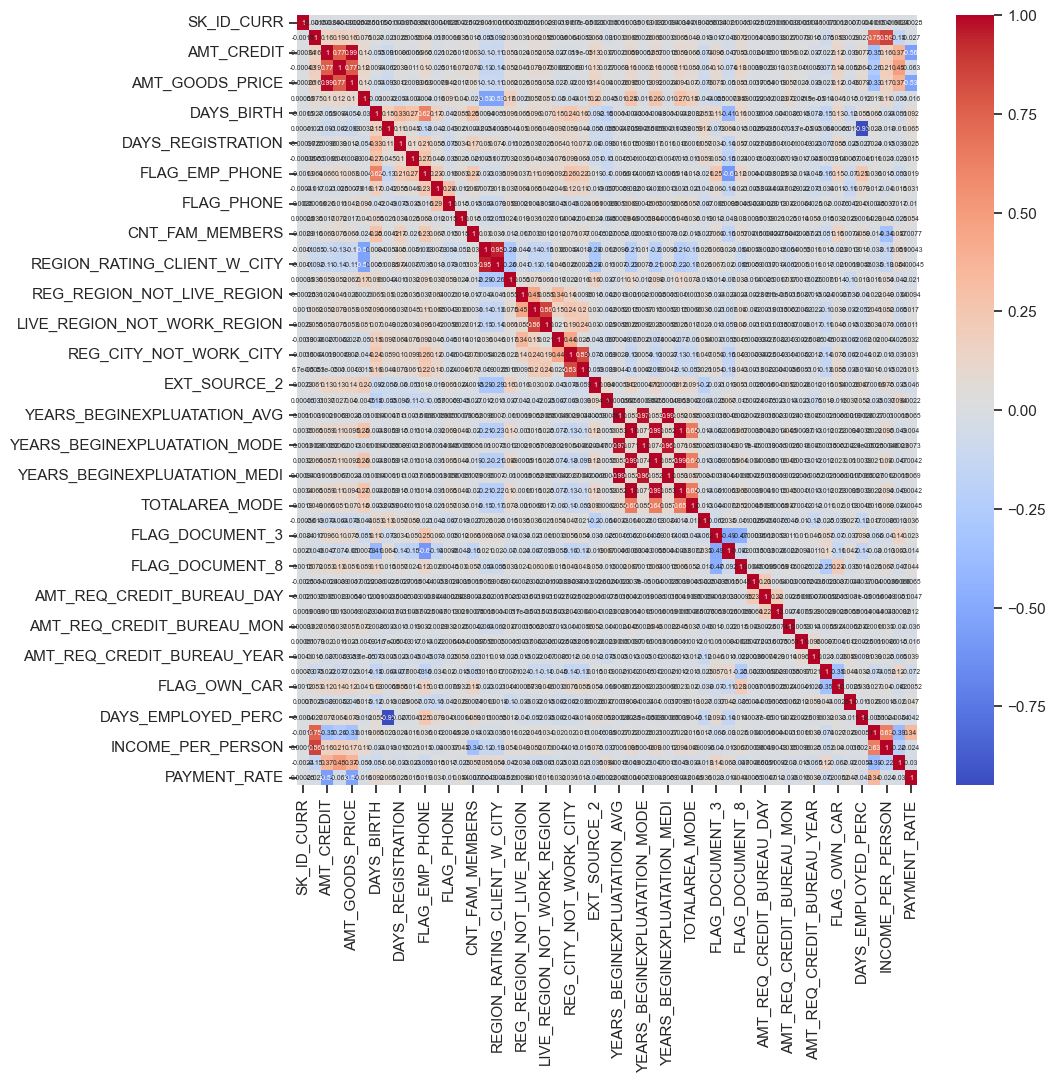

[('FLOORSMAX_AVG', 'FLOORSMAX_MEDI'),
 ('FLOORSMAX_MEDI', 'FLOORSMAX_AVG'),
 ('YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI'),
 ('YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG'),
 ('FLOORSMAX_MODE', 'FLOORSMAX_MEDI'),
 ('FLOORSMAX_MEDI', 'FLOORSMAX_MODE'),
 ('AMT_GOODS_PRICE', 'AMT_CREDIT'),
 ('AMT_CREDIT', 'AMT_GOODS_PRICE'),
 ('FLOORSMAX_AVG', 'FLOORSMAX_MODE'),
 ('FLOORSMAX_MODE', 'FLOORSMAX_AVG'),
 ('YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE'),
 ('YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG'),
 ('YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE'),
 ('YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI'),
 ('REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'),
 ('REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT'),
 ('DAYS_EMPLOYED', 'DAYS_EMPLOYED_PERC'),
 ('DAYS_EMPLOYED_PERC', 'DAYS_EMPLOYED'),
 ('AMT_INCOME_TOTAL', 'INCOME_PER_PERSON'),
 ('INCOME_PER_PERSON', 'AMT_INCOME_TOTAL'),
 ('REG_REGIO

In [ ]:
# Corrélation Spearman
# Compute the correlation matrix
corr_matrix = application_train.corr(numeric_only=True)
corr_matrix = X_train_joined.corr(numeric_only=True)

# Plot the heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 35 / np.sqrt(len(corr_matrix))})
plt.show()

# Identify highly correlated pairs
threshold = 0.8
corr_pairs = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
high_corr = [(a, b) for a, b in corr_pairs.index if a != b and corr_pairs[(a, b)] > threshold]
high_corr

In [147]:
# Drop colonnes, une parmi les paires de colonnes très corrélées
cols_to_drop = ['AMT_GOODS_PRICE', 'FLOORSMAX_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', '']
X_train_joined.drop(labels='AMT_GOODS_PRICE', axis=1, inplace=True)

In [148]:
X_train_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 59 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  float64
 1   CNT_CHILDREN                  307511 non-null  object 
 2   AMT_INCOME_TOTAL              307511 non-null  float64
 3   AMT_CREDIT                    307511 non-null  float64
 4   AMT_ANNUITY                   307511 non-null  float64
 5   REGION_POPULATION_RELATIVE    307511 non-null  float64
 6   DAYS_BIRTH                    307511 non-null  float64
 7   DAYS_EMPLOYED                 307511 non-null  float64
 8   DAYS_REGISTRATION             307511 non-null  float64
 9   DAYS_ID_PUBLISH               307511 non-null  float64
 10  FLAG_EMP_PHONE                307511 non-null  float64
 11  FLAG_WORK_PHONE               307511 non-null  float64
 12  FLAG_PHONE                    307511 non-nul